# TP1

Alumno: Maximiliano Medina


Parte 1 (imágenes en /white_patch y /coord_cromaticas)
1. Implementar el algoritmo de pasaje a coordenadas cromáticas para librarnos de las variaciones de contraste.

2. Implementar el algoritmo White Patch para librarnos de las diferencias de color de iluminación.

3. Mostrar los resultados obtenidos y analizar las posibles fallas (si es que las hay) en el caso de White patch.

Parte 2:
1. Para las imágenes img1_tp.png y img2_tp.png leerlas con OpenCV en escala de grises y visualizarlas.
2. Elija el numero de bins que crea conveniente y grafique su histograma, compare los histogramas entre si.
Explicar lo que se observa, si tuviera que entrenar un modelo de clasificación/detección de imágenes, considera que puede ser de utilidad tomar como ‘ features ’ a los historigramas?
3. Para la imagen segmentacion.png analice el histograma de los canales RGB. Segmente algunos de los elementos presentes en la imagen (agua, cielo, tierra) y muestre, aplicando mascaras, las regiones en imágenes separadas.

#### Importar librerías

In [2]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from pathlib import Path

### Parte 1
#### 1.1

In [79]:
path='imagenes/coord_cromaticas/'
imgs = [cv2.imread(path + file.name) for file in Path(path).iterdir()]

In [221]:
def coord_cromaticas(img):
    img_np = np.array(img)
    sum = np.sum(img_np, axis=2)
    sum[np.where(sum==0)] = 1
    img_cc = np.stack([np.uint8(np.divide(img_np[:,:,0], sum)*255),
                        np.uint8(np.divide(img_np[:,:,1], sum)*255),
                        np.uint8(np.divide(img_np[:,:,2],sum)*255)], axis=2)
    return img_cc

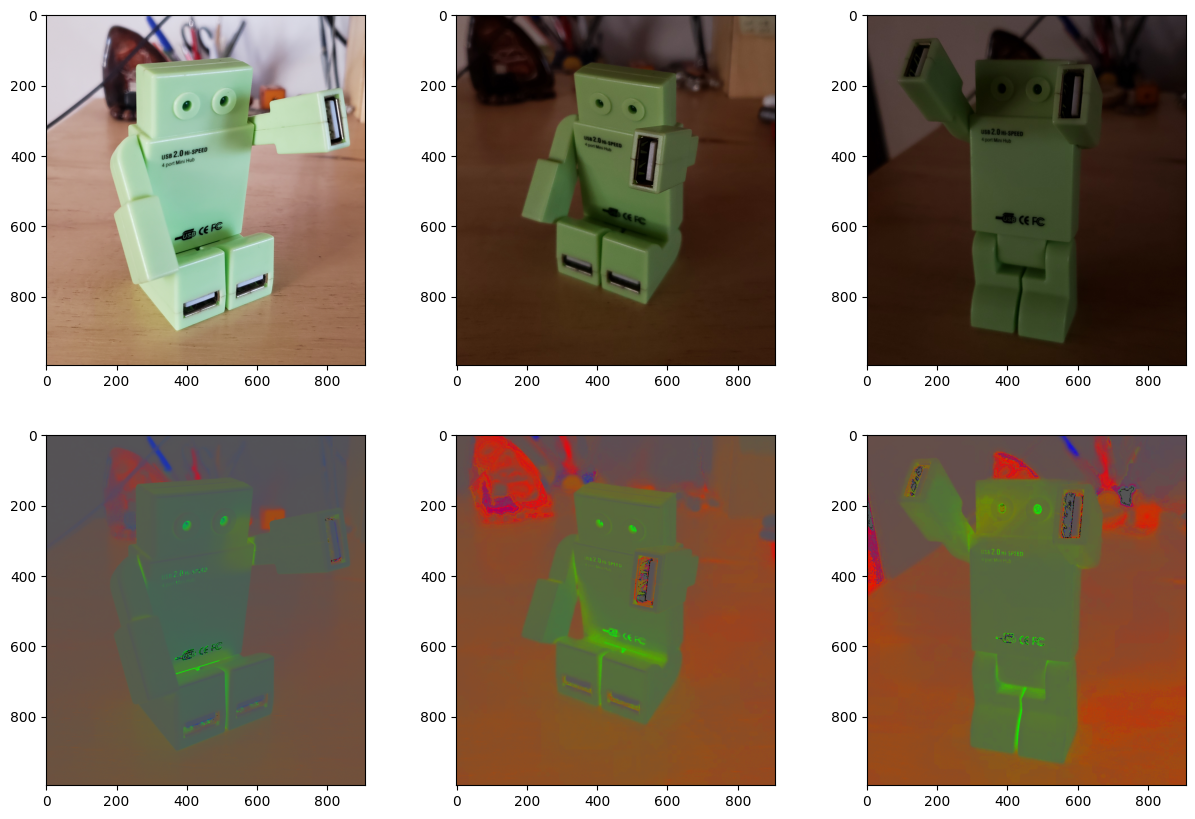

In [80]:
# Imagenes originales y modificadas por coordenadas cromaticas
fig = plt.figure(figsize=(15,10))
for i, img in enumerate(imgs):
    plt.subplot(2,3,i+1)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.subplot(2,3,i+4)
    plt.imshow(cv2.cvtColor(coord_cromaticas(img), cv2.COLOR_BGR2RGB))

#### 1.2

In [81]:
path='imagenes/white_patch/'
imgs = [cv2.imread(path + file.name) for file in Path(path).iterdir()]

In [222]:
def white_patch(img):
    img_np = np.array(img)
    max_r = img_np[:,:,0].max()
    max_g = img_np[:,:,1].max()
    max_b = img_np[:,:,2].max()
    img_wp = np.stack([np.uint8(np.divide(img_np[:,:,0], max_r)*255),
                        np.uint8(np.divide(img_np[:,:,1], max_g)*255),
                        np.uint8(np.divide(img_np[:,:,2],max_b)*255)], axis=2)
    return img_wp

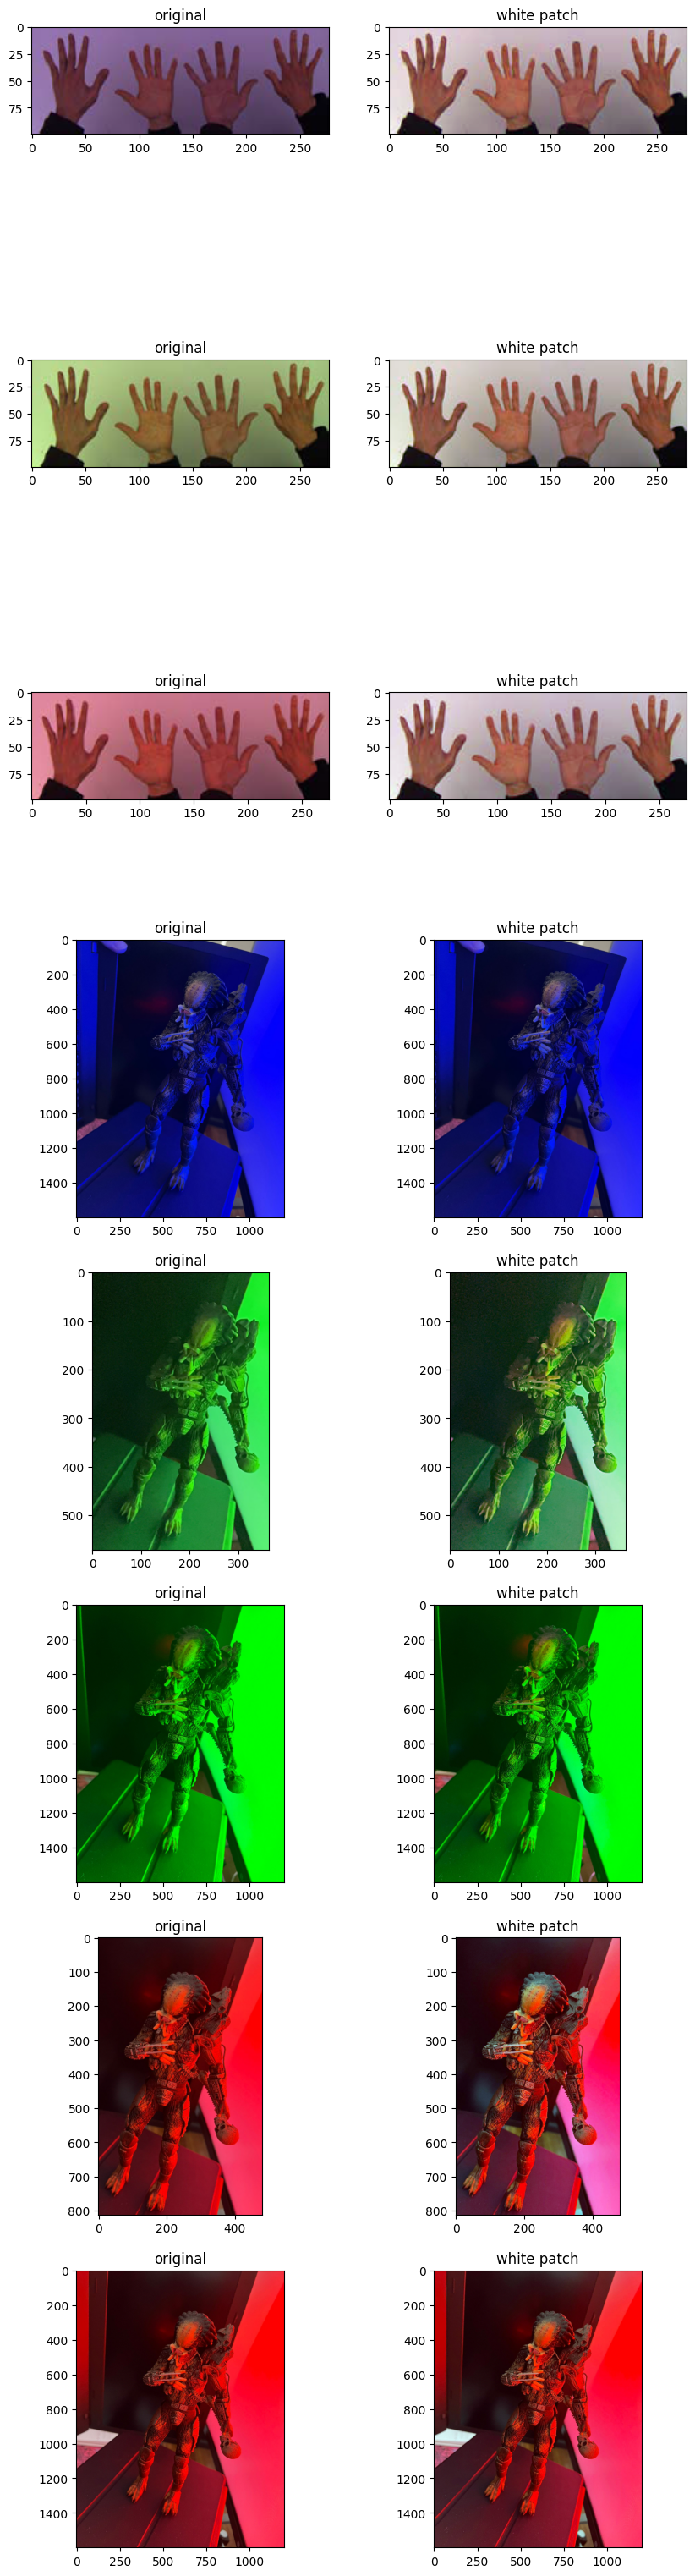

In [164]:
# Imagenes originales y modificadas por white patch
fig = plt.figure(figsize=(10,40))
for i, img in enumerate(imgs):
    plt.subplot(len(imgs),2,i+2*i//2+1)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)),plt.title('original')
    plt.subplot(len(imgs),2,i+2*i//2+2)
    plt.imshow(cv2.cvtColor(white_patch(img), cv2.COLOR_BGR2RGB)),plt.title('white patch')

#### 1.3
En los puntos 1.1 y 1.2 se logra ver con bastante claridad el resultado de aplicar los algoritmos.


Con el algoritmo de coordenadas crómaticas se logra describir una imagen (en el ejemplo identificar un objeto) independientemente del contraste de la misma.

El algoritmo White Patch permite corregir la influencia del color de la fuente de iluminación de la imagen. 
En el ejemplo de las imagenes de las manos se ve claramente, ya que al corregir las imagenes mediante el algoritmo White Patch se obtienen imagenes con colores muy similares y correspondientes a la realidad (se aprecia en el color de la piel, por ejemplo).

Este algoritmo no da buen resultado si alguno de los 3 canales está saturado debido a que no es posible compensar el color para ese canal.
Esto se ve en la imagen de los depredadores, donde la correccion es casi imperceptible, ya que la saturacion en los canales anula el factor multiplicador.

### Parte 2
#### 2.1

In [82]:
imgsG=[]
imgsG.append(cv2.imread("imagenes/img1_tp.png",cv2.IMREAD_GRAYSCALE))
imgsG.append(cv2.imread("imagenes/img2_tp.png",cv2.IMREAD_GRAYSCALE))

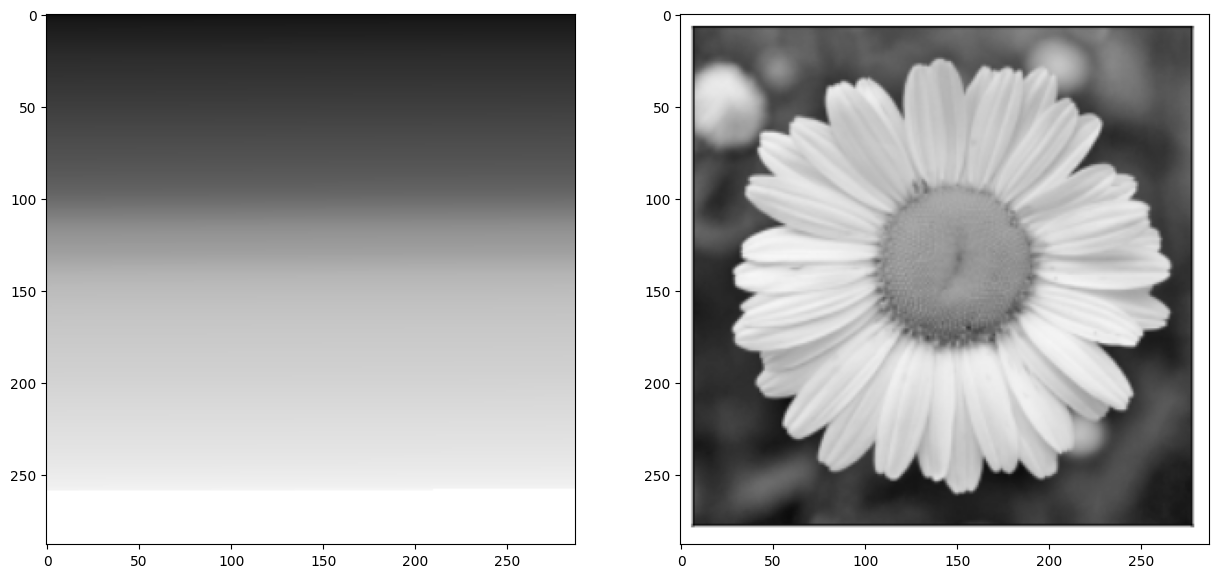

In [83]:
fig = plt.figure(figsize=(15, 10))
plt.subplot(1,2,1)
plt.imshow(cv2.cvtColor(imgsG[0], cv2.IMREAD_GRAYSCALE))
plt.subplot(1,2,2)
plt.imshow(cv2.cvtColor(imgsG[1], cv2.IMREAD_GRAYSCALE))

#### 2.2

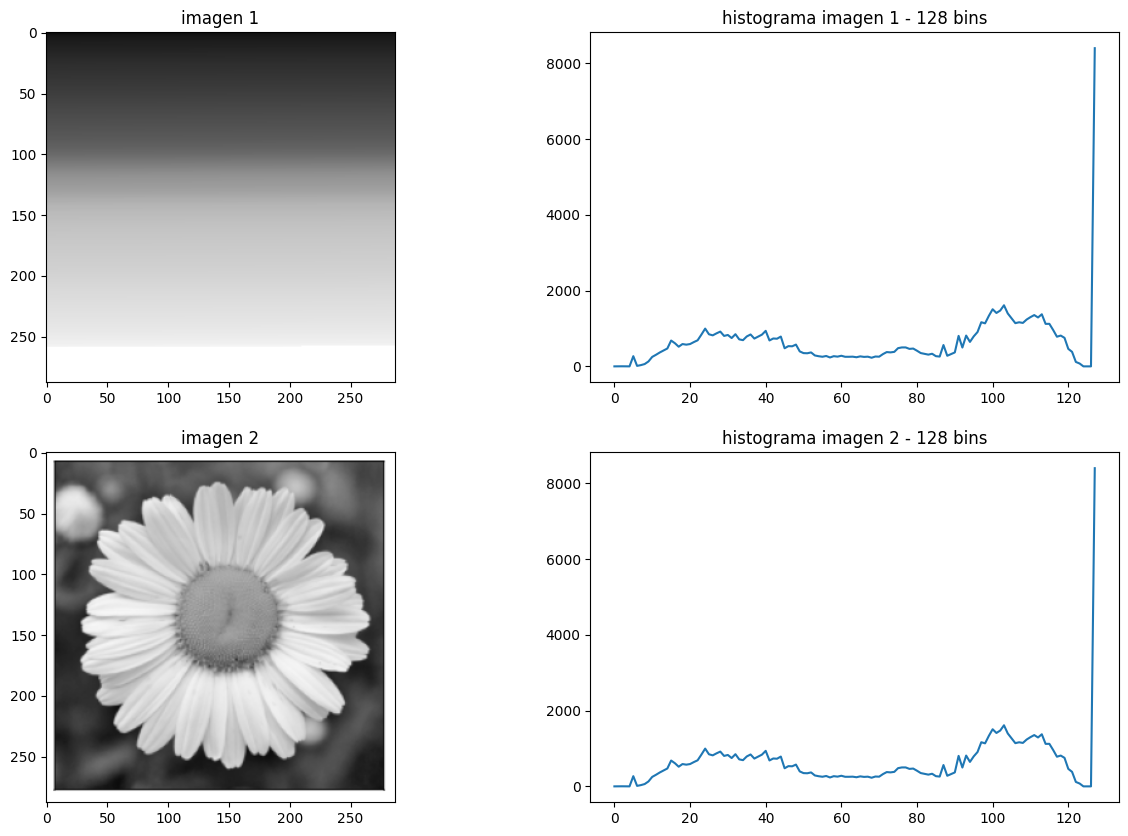

In [93]:
fig = plt.figure(figsize=(15, 10))
for i, img in enumerate(imgsG):
    imgG = cv2.cvtColor(img, cv2.IMREAD_GRAYSCALE)
    plt.subplot(2, 2, i+2*i//2+1)
    plt.imshow(imgG, cmap='gray'),plt.title(f'imagen {i+1}')

    hist=cv2.calcHist([imgG],[0],None,[128],[0,256])
    plt.subplot(2, 2, i+2*i//2+2)
    plt.plot(hist), plt.title(f'histograma imagen {i+1} - 128 bins')

Ambos histogramas se parecen (o son iguales), a pesar de que las imagenes son muy diferentes.
La conclusión que se puede sacar es que, en este caso, el histograma no sería la mejor feature si tuviera que entrenar un modelo de clasificación/detección de imágenes solo a partir de esta información.
Existiran casos en que pueda ser de utilidad pero se debe evaluar cada aplicacion en particular para determinar cuan util puede resultar.

#### 2.3

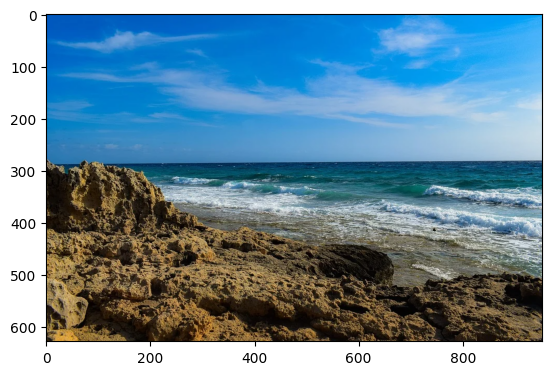

In [46]:
imgSeg = cv2.imread('imagenes/segmentacion.png')
imgSegRGB = cv2.cvtColor(imgSeg, cv2.COLOR_BGR2RGB)
plt.imshow(imgSegRGB)

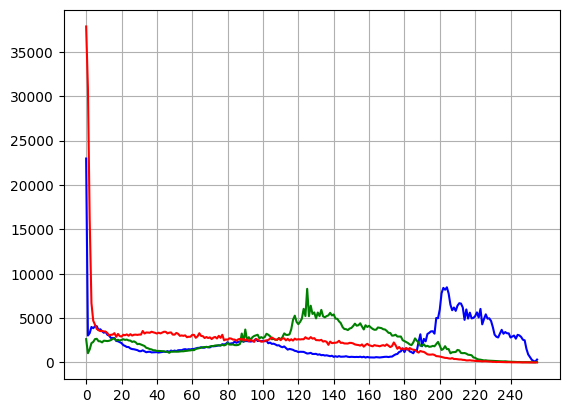

In [223]:
#histograma de los canales BGR
color = ('b','g','r')
for i,col in enumerate(color):
    hist = cv2.calcHist([imgSeg],[i],None,[256],[0,256])
    plt.xticks(range(0,256,20))
    plt.plot(hist,color = col)
    plt.grid(True)

Se notan picos en los colores azul y verde, por esto se prueba, a continuacion, la segmentacion separando los pixeles segun vemos en el histograma.

In [219]:
def segmentacion(img,tl,tu):
    imgS=img.copy()
    B,G,R = cv2.split(imgS)
    rows,cols,dim=imgS.shape
    for i in range(rows):
        for j in range(cols):
                (b,g,r)=imgS[i,j]
                if b>tu or b<tl:
                    imgS[i,j]=(int(b*0),int(g*0),int(r*0))
    return imgS

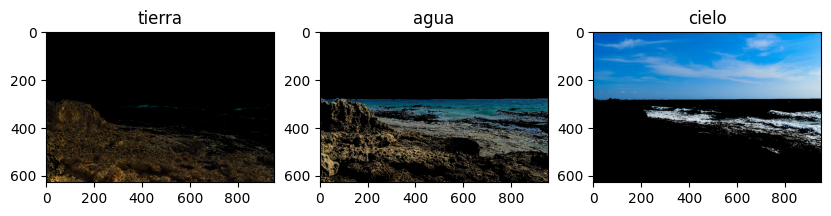

In [220]:
imgsSeg=[]
imgsSeg.append(('tierra', segmentacion(imgSeg,0,70)))
imgsSeg.append(('agua', segmentacion(imgSeg,70,170)))
imgsSeg.append(('cielo', segmentacion(imgSeg,170,255)))

fig = plt.figure(figsize=(10,40))
for i, img in enumerate(imgsSeg):
    plt.subplot(1,3,i+1)
    plt.imshow(cv2.cvtColor(imgsSeg[i][1], cv2.COLOR_BGR2RGB)),plt.title(imgsSeg[i][0])

La imagen tiene una composición de colores compleja, por lo cual, los histogramas de los canales BGR no aportan la información suficiente para una separación efectiva.
A continuación se convertira a un espacio de color HSV para intentar mejorar la segmentación.

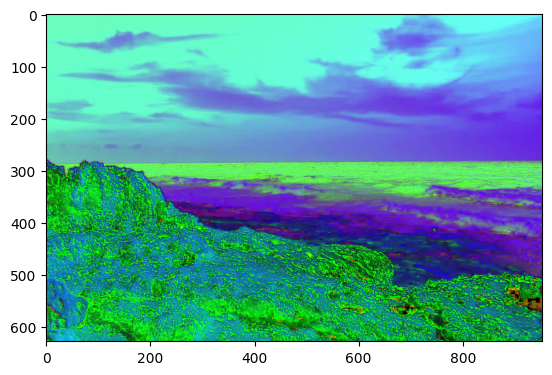

In [139]:
imgHSV = cv2.cvtColor(imgSeg, cv2.COLOR_BGR2HSV)
plt.imshow(imgHSV)

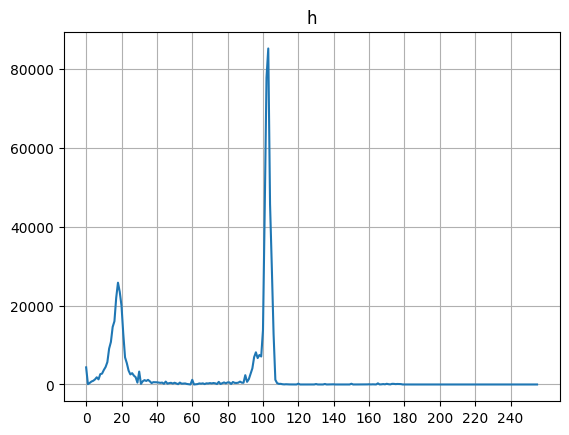

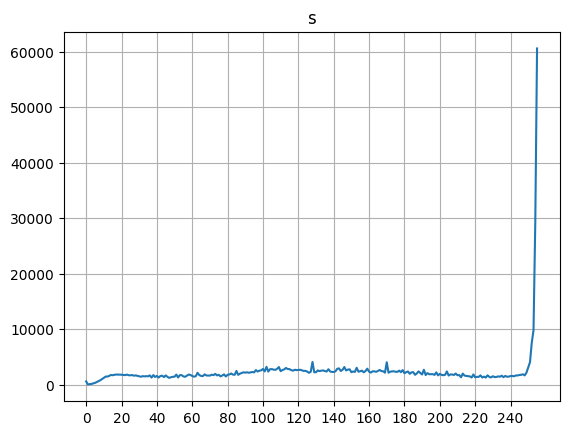

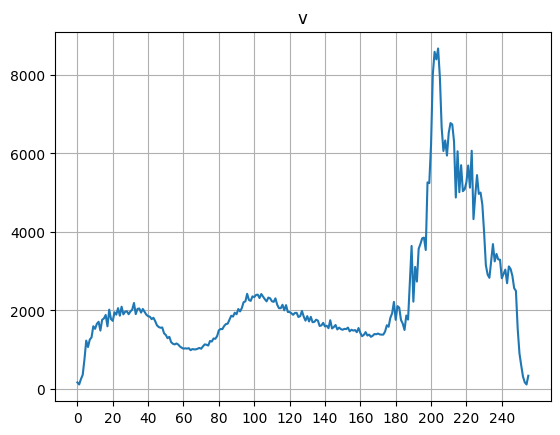

In [224]:
h, s, v = cv2.split(imgHSV)
color = ('h','s','v')
for i,col in enumerate(color):
    hist = cv2.calcHist([imgHSV],[i],None,[256],[0,256])

    plt.figure()
    plt.xticks(range(0,256,20))
    plt.plot(hist),plt.title(col)
    plt.grid(True)

In [74]:
def segmentacionHSV(img, bl, bu):
    mask = cv2.inRange(imgHSV, bl, bu)
    imgSegmentada = cv2.bitwise_and(imgSegRGB, imgSegRGB, mask=mask)
    #contours, hier = cv2.findContours(mask.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    #output = cv2.drawContours(imgSegmentada, contours, -1, (0, 0, 255), 3)
    return imgSegmentada

Nuevamente, a partir de los histogramas se puede establecer los limites para las mascaras.

Para el cielo, en hue corresponderia al pico entre 100 y 108 (probablemente tambien agua), en saturacion no se puede distinguir y en value el cielo corresponde al pico a partir de 175.


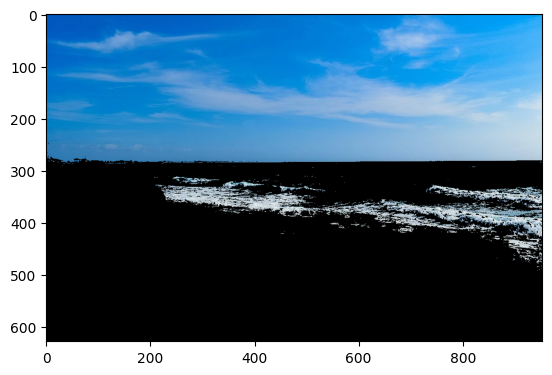

In [199]:
#CIELO
limite_inf = np.array([90, 10, 175])
limite_sup = np.array([110, 255, 255])
plt.imshow(segmentacionHSV(imgHSV, limite_inf, limite_sup))

Para la tierra, en hue corresponderia al pico entre 0 y 65.

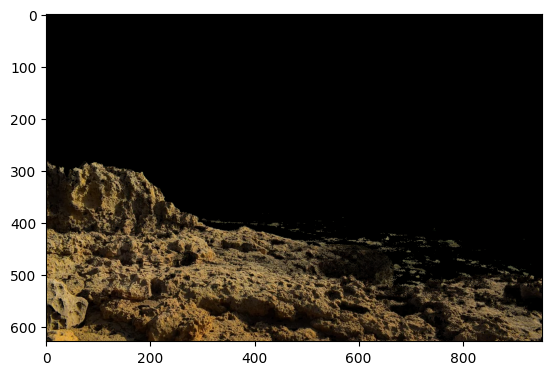

In [198]:
#TIERRA
limite_inf = (0,65,0)
limite_sup = (65,255,255)
plt.imshow(segmentacionHSV(imgHSV, limite_inf, limite_sup))

Para el agua, en hue corresponderia al pico entre 100 y 108 con value por debajo de 175.

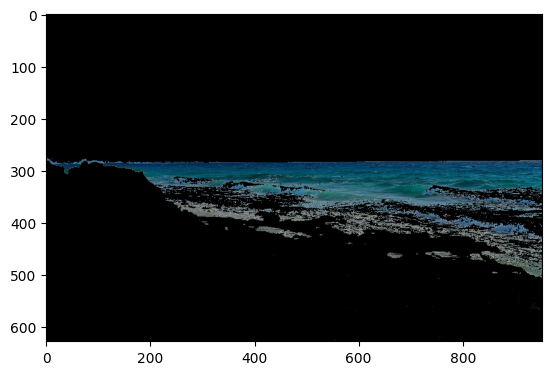

In [201]:
#AGUA
limite_inf = (50, 0, 0)
limite_sup = (110, 255, 170)
plt.imshow(segmentacionHSV(imgHSV, limite_inf, limite_sup))

Se mejoro la segmentacion usando el espacio HSV, aunque no se logro una efectiva separacion del agua y el cielo.